Environment and Data Setup


In [1]:
pip install tensorflow pandas numpy scikit-learn

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the data, limiting to the top 10,000 most frequent words
max_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set a maximum review length (a key parameter for laptop performance)
maxlen = 200

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

Defining The LSTM Model Architecture


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Model Hyperparameters
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.5

model = Sequential([
    # 1. Embedding Layer: Turns integer indices into dense vectors of fixed size (128)
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),

    # 2. LSTM Layer: Processes the sequence of embeddings
    LSTM(units=lstm_units),

    # 3. Dropout Layer: Helps prevent overfitting
    Dropout(dropout_rate),

    # 4. Dense Output Layer: Binary classification (positive/negative) using 'sigmoid'
    # 'units=1' is for binary classification
    Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compiling And Training The Model

In [6]:
# For a laptop, keep batch_size small (32 or 64) and epochs low (5-10)
batch_size = 32
epochs = 5

print("Starting model training...")

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2 # Use 20% of training data for validation
)

print("Training complete.")

Starting model training...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 124ms/step - accuracy: 0.7145 - loss: 0.5427 - val_accuracy: 0.8450 - val_loss: 0.3680
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.8765 - loss: 0.3111 - val_accuracy: 0.8594 - val_loss: 0.3350
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9152 - loss: 0.2310 - val_accuracy: 0.8438 - val_loss: 0.3713
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.9521 - loss: 0.1420 - val_accuracy: 0.8384 - val_loss: 0.4038
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9631 - loss: 0.1109 - val_accuracy: 0.8584 - val_loss: 0.4155
Training complete.


# ***Data Exploration and Visualization***

A. Reverse Tokenization and Prepare Data

B. Visualize Word Frequency

C.Visualize Review Length Distribution

D.Verify Sentiment Balance

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data again (with the max_words limit)
max_words = 10000
(X_train_int, y_train), (X_test_int, y_test) = imdb.load_data(num_words=max_words)
maxlen = 200

# Get the word index dictionary
word_index = imdb.get_word_index()
# Create a reverse index mapping (integer to word)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# The indices are offset by 3 (0: padding, 1: start of sequence, 2: unknown)
def decode_review(int_sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in int_sequence])

# Combine all training reviews into a single list of words
all_words_train = [word for review in X_train_int for word in review]

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


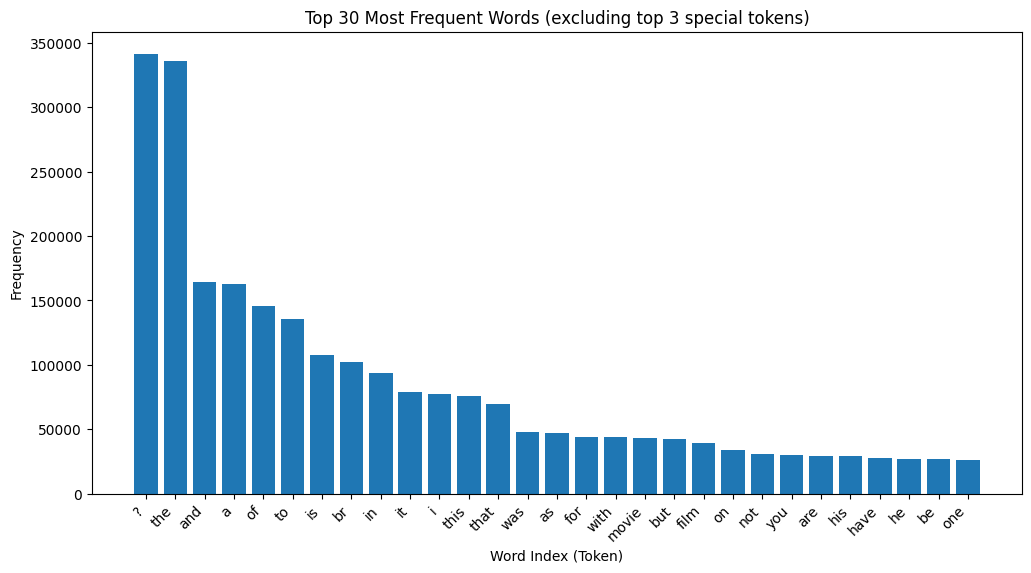

In [8]:
# Visualize the 30 most common words
word_counts = Counter(all_words_train)
most_common_30 = word_counts.most_common(30)

words, counts = zip(*most_common_30)
# Adjusting words to actual text labels
text_words = [reverse_word_index.get(w - 3, '?') for w in words]

plt.figure(figsize=(12, 6))
plt.bar(text_words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 30 Most Frequent Words (excluding top 3 special tokens)')
plt.ylabel('Frequency')
plt.xlabel('Word Index (Token)')
plt.show()

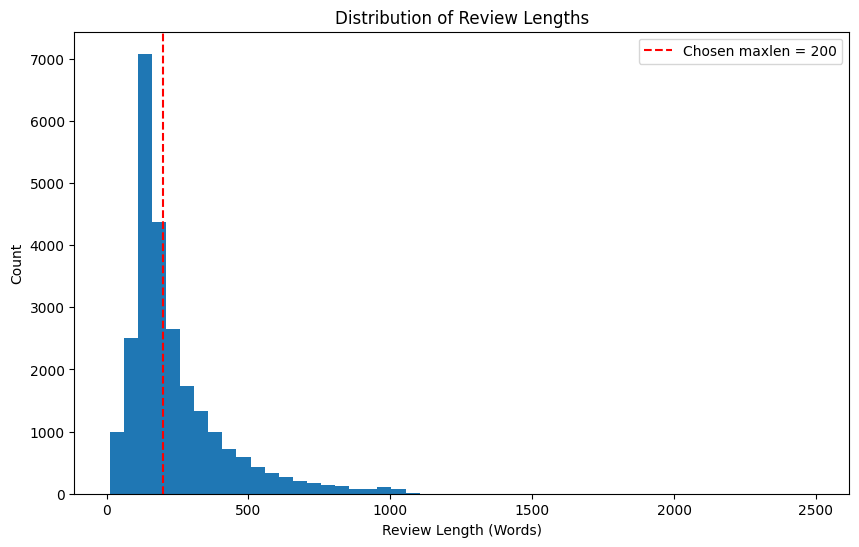


Average review length: 238.71


In [9]:
# Calculate review lengths
train_lengths = [len(x) for x in X_train_int]

# Plot histogram of lengths
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=50)
plt.axvline(x=maxlen, color='r', linestyle='--', label=f'Chosen maxlen = {maxlen}')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Words)')
plt.ylabel('Count')
plt.legend()
plt.show()

print(f"\nAverage review length: {np.mean(train_lengths):.2f}")
# Justify maxlen: We chose 200 to cover the majority of reviews without too much padding.

In [10]:
# Check balance of the target variable
sentiment_counts = Counter(y_train)

print(f"Positive (1) reviews: {sentiment_counts[1]}")
print(f"Negative (0) reviews: {sentiment_counts[0]}")
print(f"Dataset is balanced: {sentiment_counts[1] == sentiment_counts[0]}")
# IMDb is famously balanced, which is ideal for classification.

Positive (1) reviews: 12500
Negative (0) reviews: 12500
Dataset is balanced: True


# ***Model Improvement : Bi-LSTM Architecture***

A. Define the Bi-LSTM Model

B. Train the Bi-LSTM Model with Early Stopping

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Ensure data is padded before running this block
X_train = pad_sequences(X_train_int, maxlen=maxlen)
X_test = pad_sequences(X_test_int, maxlen=maxlen)

# Model Hyperparameters
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.5
batch_size = 32
epochs = 10 # Increase epochs, but rely on EarlyStopping

# Define the Bi-LSTM Model
bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    # Use Bidirectional wrapper for a significant boost
    Bidirectional(LSTM(units=lstm_units)),
    Dropout(dropout_rate),
    Dense(units=1, activation='sigmoid')
])

bilstm_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

print("Bi-LSTM Model Summary:")
bilstm_model.summary()

Bi-LSTM Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Set up Early Stopping
# Monitor validation loss and stop if it doesn't improve for 3 epochs (patience=3)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("Starting Bi-LSTM model training (up to 10 epochs, with Early Stopping)...")

bilstm_history = bilstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2, # Validation data for monitoring
    callbacks=[early_stopping] # Apply early stopping
)

print("Training complete.")

Starting Bi-LSTM model training (up to 10 epochs, with Early Stopping)...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 224ms/step - accuracy: 0.7152 - loss: 0.5275 - val_accuracy: 0.8508 - val_loss: 0.3461
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 221ms/step - accuracy: 0.9035 - loss: 0.2557 - val_accuracy: 0.8406 - val_loss: 0.3727
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 219ms/step - accuracy: 0.9329 - loss: 0.1854 - val_accuracy: 0.8496 - val_loss: 0.3644
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.9587 - loss: 0.1216 - val_accuracy: 0.8204 - val_loss: 0.4361
Training complete.


# ***Analysis and Reporting***

A.Training History Visualization

B.Confusion Matrix and Classification Report

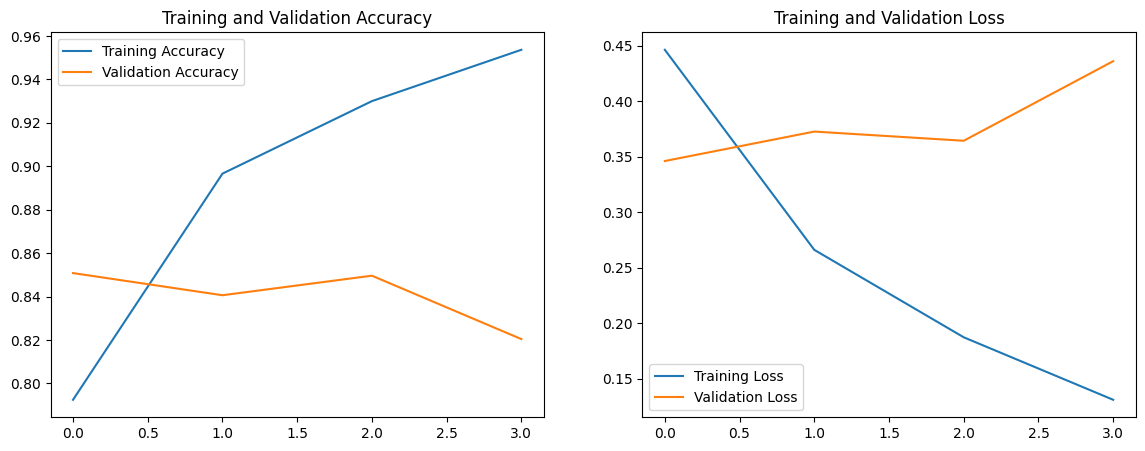

In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

plot_history(bilstm_history)

# Look at this plot to determine if your model overfit or underfit!

782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step


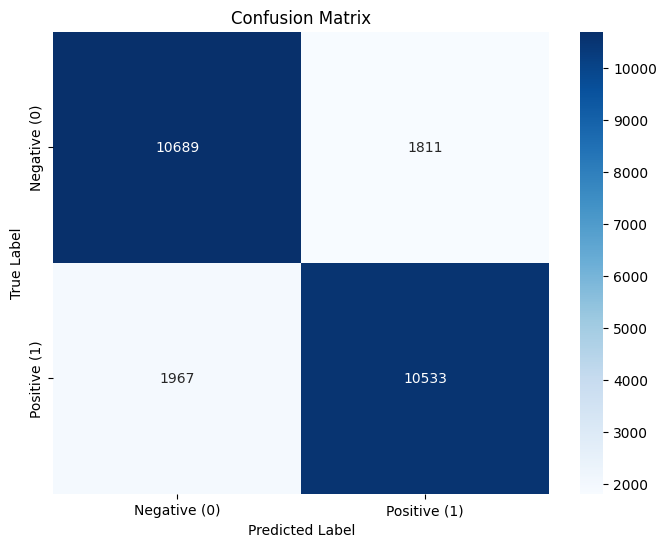


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.85      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Final Test Accuracy: 84.89%


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Predict probabilities on the test set
y_pred_proba = bilstm_model.predict(X_test)
# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Print detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {final_accuracy*100:.2f}%")

# ***Deployment and Finalization***

In [15]:
import os

model_save_path = 'bilstm_sentiment_model.h5'
bilstm_model.save(model_save_path)
print(f"Model successfully saved to {model_save_path}")

Model successfully saved to bilstm_sentiment_model.h5


In [16]:
from google.colab import files
files.download('bilstm_sentiment_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import json
from tensorflow.keras.datasets import imdb

# Load the index again to ensure it's correct
word_index = imdb.get_word_index()

# Save the index to a JSON file
with open('word_index.json', 'w') as f:
    json.dump(word_index, f)

files.download('word_index.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>